# CALCOLO OPINION LEADER

### Importazione librerire e dataframes

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from tabulate import tabulate

In [2]:
tweet_users = pd.read_csv("../datasets/twitter/twitter_users.csv")
tweet_collection = pd.read_csv("../datasets/twitter/twitter_tweet_collection.csv")
# Importazione picco negativo
tweets_picco_0_neg = pd.read_csv("../dataframes/tweets_filtrati_picco_0_negativo_token_9032.csv")
# Importazione picchi positivi
tweets_picco_0_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_0_token_6563.csv")
tweets_picco_1_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_1_token_4037.csv")
tweets_picco_2_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_2_token_12247.csv")
tweets_picco_3_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_3_token_8898.csv")
tweets_picco_4_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_4_token_4704.csv")

### Merge dei tweet e la descrizione degli autori di tali tweet per ogni picco

In [3]:
merge_data_neg_0_description = pd.merge(tweets_picco_0_neg, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_0_neg = pd.merge(merge_data_neg_0_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_0_description = pd.merge(tweets_picco_0_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_0_pos = pd.merge(merge_data_0_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_1_description = pd.merge(tweets_picco_1_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_1_pos = pd.merge(merge_data_1_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_2_description = pd.merge(tweets_picco_2_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_2_pos = pd.merge(merge_data_2_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_3_description = pd.merge(tweets_picco_3_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_3_pos = pd.merge(merge_data_3_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_4_description = pd.merge(tweets_picco_4_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_4_pos = pd.merge(merge_data_4_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

# Token negativo 9032

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 9032

Utilizzo il metodo della silhoutte per trovare qual'è il miglior k (ossia il miglior numero di cluster) per la riuscita della ricerca

In [4]:
# Seleziona le colonne rilevanti per il clustering
X = merge_0_neg[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_0_neg['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}  # Personalizza le etichette come desiderato
merge_0_neg['opinion_leader'] = merge_0_neg['cluster'].map(cluster_mapping)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Per n_clusters = 2, la media silhouette_score è: 0.9882965744497432


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Per n_clusters = 3, la media silhouette_score è: 0.9790224143675661


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Per n_clusters = 4, la media silhouette_score è: 0.9390344435293829


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Troviamo quindi che k=2 ha il valore di sihlouette migliore per la clusterizzazione di questo dataframe, per questo utilizziamo solo due classi (top OL e weak OL)

### GRAFICO K-MEANS per token 9032

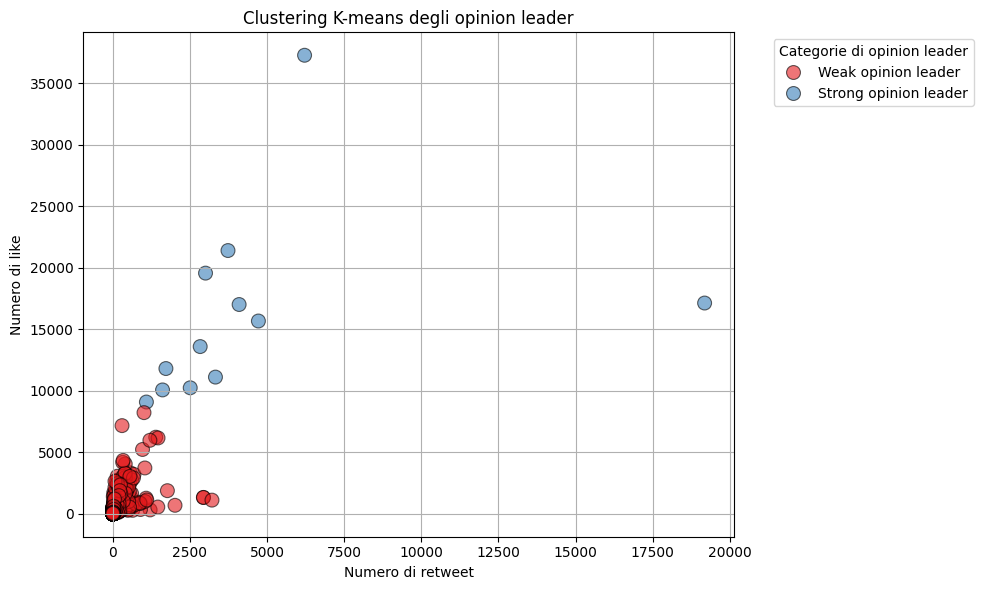

In [5]:
# Grafico dei cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merge_0_neg,
    x='retweet_count',
    y='like_count',
    hue='opinion_leader',
    palette='Set1',
    s=100,
    alpha=0.6,
    edgecolor='black'
)

plt.xlabel('Numero di retweet')
plt.ylabel('Numero di like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Migliora la disposizione degli elementi nel grafico
plt.show()

In [6]:
# Filtra i tweet nella classe 'Strong opinion leader'
strong_opinion_leaders = merge_0_neg[merge_0_neg['opinion_leader'] == 'Strong opinion leader']

# Conta il numero di strong opinion leader
num_strong_opinion_leaders = strong_opinion_leaders.shape[0]

# Stampa il numero di strong opinion leader
print(f"Numero di strong opinion leader: {num_strong_opinion_leaders}")

# Conta il numero di tweet per ciascun strong opinion leader
tweet_counts = strong_opinion_leaders['author_id'].value_counts()

# Stampa il numero di tweet per ciascun strong opinion leader
print("\nNumero di tweet per ciascun strong opinion leader:")
for author_id, count in tweet_counts.items():
    print(f"Autor ID: {author_id}, Numero di tweet: {count}")

# Stampa le informazioni dei tweet degli strong opinion leader
table = strong_opinion_leaders[['retweet_count', 'like_count', 'quote_count', 'reply_count', 
                                'author_id', 'tweet_id', 'content', 'description', 
                                'Sentiment', 'collection']].reset_index(drop=True)

# Converti il dataframe in una lista di tuple per tabulate
table_data = [tuple(x) for x in table.values]

# Intestazioni delle colonne per la tabella
headers = ['Retweet Count', 'Like Count', 'Quote Count', 'Reply Count', 
           'Author ID', 'Tweet ID', 'Content', 'Description', 
           'Sentiment', 'Collection']

# Stampa la tabella utilizzando tabulate
print("\nInformazioni dettagliate dei tweet degli strong opinion leader:")
print(tabulate(table_data, headers=headers, tablefmt='grid'))

# Filtra le informazioni degli utenti per gli strong opinion leader
strong_opinion_leader_ids = strong_opinion_leaders['author_id'].unique()
strong_opinion_leader_info = tweet_users[tweet_users['user_id'].isin(strong_opinion_leader_ids)]

# Converti il dataframe in una lista di tuple per tabulate
user_table_data = [tuple(x) for x in strong_opinion_leader_info.values]

# Intestazioni delle colonne per la tabella delle informazioni degli utenti
user_headers = list(strong_opinion_leader_info.columns)

# Stampa la tabella utilizzando tabulate
print("\nInformazioni degli utenti strong opinion leader:")
print(tabulate(user_table_data, headers=user_headers, tablefmt='grid'))


Numero di strong opinion leader: 12

Numero di tweet per ciascun strong opinion leader:
Autor ID: 1066783465323065344, Numero di tweet: 1
Autor ID: 879737099074887682, Numero di tweet: 1
Autor ID: 81554003, Numero di tweet: 1
Autor ID: 1083809870816649217, Numero di tweet: 1
Autor ID: 1386889706152026113, Numero di tweet: 1
Autor ID: 754903686497701889, Numero di tweet: 1
Autor ID: 1307618794458681345, Numero di tweet: 1
Autor ID: 1448788104605835265, Numero di tweet: 1
Autor ID: 1353833377, Numero di tweet: 1
Autor ID: 1251833913149816832, Numero di tweet: 1
Autor ID: 235927383, Numero di tweet: 1
Autor ID: 1025339104865730560, Numero di tweet: 1

Informazioni dettagliate dei tweet degli strong opinion leader:
+-----------------+--------------+---------------+---------------+---------------------+---------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Token positivo 6563

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 6563

In [7]:
# Seleziona le colonne rilevanti per il clustering
X = merge_0_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_0_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}  # Personalizza le etichette come desiderato
merge_0_pos['opinion_leader'] = merge_0_pos['cluster'].map(cluster_mapping)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Per n_clusters = 2, la media silhouette_score è: 0.9770164490399363


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Per n_clusters = 3, la media silhouette_score è: 0.949899566879977


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Per n_clusters = 4, la media silhouette_score è: 0.9298604995568458


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


##### GRAFICO K-MEANS per token 6563

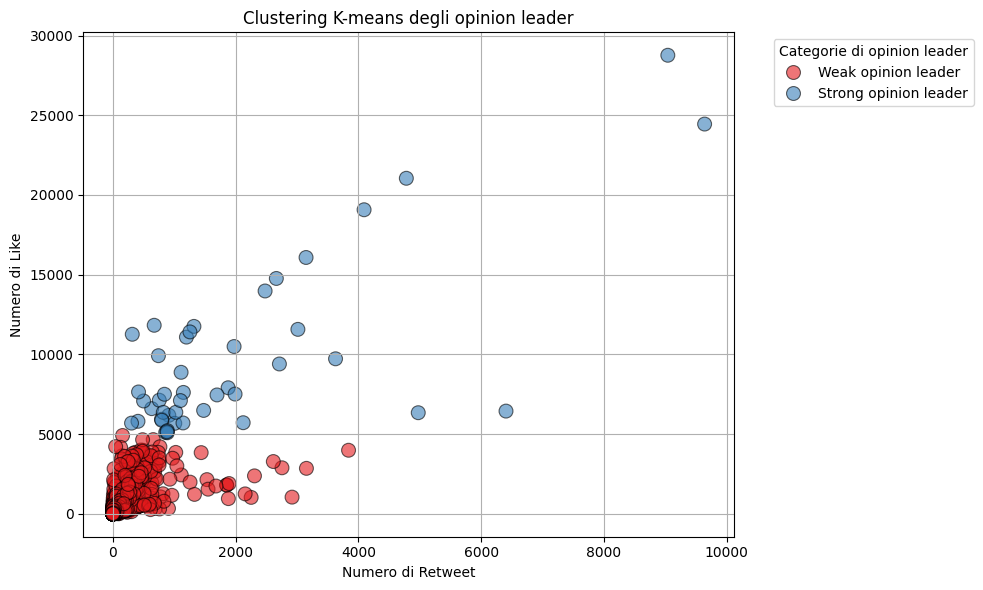

In [8]:
# Grafico dei cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merge_0_pos,
    x='retweet_count',
    y='like_count',
    hue='opinion_leader',
    palette='Set1',
    s=100,
    alpha=0.6,
    edgecolor='black' 
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Migliora la disposizione degli elementi nel grafico
plt.show()

In [9]:
# Filtra i tweet nella classe 'Strong opinion leader'
strong_opinion_leaders = merge_0_pos[merge_0_pos['opinion_leader'] == 'Strong opinion leader']

# Conta il numero di strong opinion leader
num_strong_opinion_leaders = strong_opinion_leaders.shape[0]

# Stampa il numero di strong opinion leader
print(f"Numero di strong opinion leader: {num_strong_opinion_leaders}")

# Conta il numero di tweet per ciascun strong opinion leader
tweet_counts = strong_opinion_leaders['author_id'].value_counts()

# Stampa il numero di tweet per ciascun strong opinion leader
print("\nNumero di tweet per ciascun strong opinion leader:")
for author_id, count in tweet_counts.items():
    print(f"Autor ID: {author_id}, Numero di tweet: {count}")

# Stampa le informazioni dei tweet degli strong opinion leader
table = strong_opinion_leaders[['retweet_count', 'like_count', 'quote_count', 'reply_count', 
                                'author_id', 'tweet_id', 'content', 'description', 
                                'Sentiment', 'collection']].reset_index(drop=True)

# Converti il dataframe in una lista di tuple per tabulate
table_data = [tuple(x) for x in table.values]

# Intestazioni delle colonne per la tabella
headers = ['Retweet Count', 'Like Count', 'Quote Count', 'Reply Count', 
           'Author ID', 'Tweet ID', 'Content', 'Description', 
           'Sentiment', 'Collection']

# Stampa la tabella utilizzando tabulate
print("\nInformazioni dettagliate dei tweet degli strong opinion leader:")
print(tabulate(table_data, headers=headers, tablefmt='grid'))

# Filtra le informazioni degli utenti per gli strong opinion leader
strong_opinion_leader_ids = strong_opinion_leaders['author_id'].unique()
strong_opinion_leader_info = tweet_users[tweet_users['user_id'].isin(strong_opinion_leader_ids)]

# Converti il dataframe in una lista di tuple per tabulate
user_table_data = [tuple(x) for x in strong_opinion_leader_info.values]

# Intestazioni delle colonne per la tabella delle informazioni degli utenti
user_headers = list(strong_opinion_leader_info.columns)

# Stampa la tabella utilizzando tabulate
print("\nInformazioni degli utenti strong opinion leader:")
print(tabulate(user_table_data, headers=user_headers, tablefmt='grid'))


Numero di strong opinion leader: 45

Numero di tweet per ciascun strong opinion leader:
Autor ID: 1233750008048033793, Numero di tweet: 4
Autor ID: 728290355188256768, Numero di tweet: 2
Autor ID: 1114005761472884741, Numero di tweet: 2
Autor ID: 1409817941705515015, Numero di tweet: 2
Autor ID: 1375950281096105985, Numero di tweet: 1
Autor ID: 1380935798812336128, Numero di tweet: 1
Autor ID: 776178699859333120, Numero di tweet: 1
Autor ID: 1173087993050976256, Numero di tweet: 1
Autor ID: 1271818114951307265, Numero di tweet: 1
Autor ID: 885739301094309889, Numero di tweet: 1
Autor ID: 1382266786049970177, Numero di tweet: 1
Autor ID: 1312706079629824000, Numero di tweet: 1
Autor ID: 1346342078024830976, Numero di tweet: 1
Autor ID: 2945446796, Numero di tweet: 1
Autor ID: 712728667651067904, Numero di tweet: 1
Autor ID: 1409554989501063174, Numero di tweet: 1
Autor ID: 1170329394298019840, Numero di tweet: 1
Autor ID: 1424376123056558090, Numero di tweet: 1
Autor ID: 30288977, Numer

# Token positivo 4037

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 4037

In [10]:
# Seleziona le colonne rilevanti per il clustering
X = merge_1_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_1_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}  # Personalizza le etichette come desiderato
merge_1_pos['opinion_leader'] = merge_1_pos['cluster'].map(cluster_mapping)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Per n_clusters = 2, la media silhouette_score è: 0.9828045684912555
Per n_clusters = 3, la media silhouette_score è: 0.9366231951564858


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Per n_clusters = 4, la media silhouette_score è: 0.8999690482189829


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### GRAFICO K-MEANS per token 4037

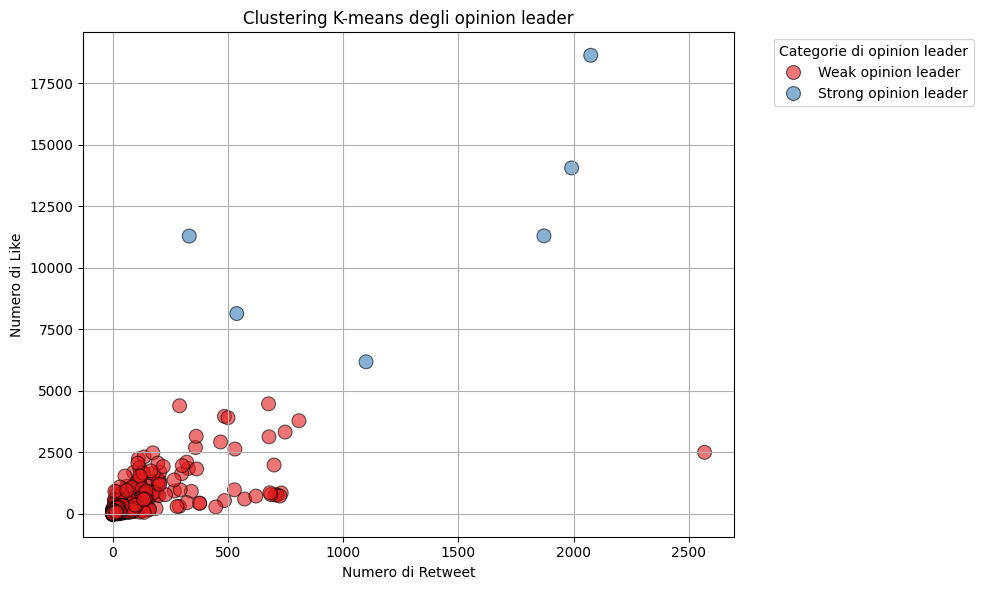

In [11]:
# Grafico dei cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merge_1_pos,
    x='retweet_count',
    y='like_count',
    hue='opinion_leader',
    palette='Set1',
    s=100,
    alpha=0.6,
    edgecolor='black' 
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Migliora la disposizione degli elementi nel grafico
plt.show()

In [12]:
# Filtra i tweet nella classe 'Strong opinion leader'
strong_opinion_leaders = merge_1_pos[merge_1_pos['opinion_leader'] == 'Strong opinion leader']

# Conta il numero di strong opinion leader
num_strong_opinion_leaders = strong_opinion_leaders.shape[0]

# Stampa il numero di strong opinion leader
print(f"Numero di strong opinion leader: {num_strong_opinion_leaders}")

# Conta il numero di tweet per ciascun strong opinion leader
tweet_counts = strong_opinion_leaders['author_id'].value_counts()

# Stampa il numero di tweet per ciascun strong opinion leader
print("\nNumero di tweet per ciascun strong opinion leader:")
for author_id, count in tweet_counts.items():
    print(f"Autor ID: {author_id}, Numero di tweet: {count}")

# Stampa le informazioni dei tweet degli strong opinion leader
table = strong_opinion_leaders[['retweet_count', 'like_count', 'quote_count', 'reply_count', 
                                'author_id', 'tweet_id', 'content', 'description', 
                                'Sentiment', 'collection']].reset_index(drop=True)

# Converti il dataframe in una lista di tuple per tabulate
table_data = [tuple(x) for x in table.values]

# Intestazioni delle colonne per la tabella
headers = ['Retweet Count', 'Like Count', 'Quote Count', 'Reply Count', 
           'Author ID', 'Tweet ID', 'Content', 'Description', 
           'Sentiment', 'Collection']

# Stampa la tabella utilizzando tabulate
print("\nInformazioni dettagliate dei tweet degli strong opinion leader:")
print(tabulate(table_data, headers=headers, tablefmt='grid'))


# Filtra le informazioni degli utenti per gli strong opinion leader
strong_opinion_leader_ids = strong_opinion_leaders['author_id'].unique()
strong_opinion_leader_info = tweet_users[tweet_users['user_id'].isin(strong_opinion_leader_ids)]

# Converti il dataframe in una lista di tuple per tabulate
user_table_data = [tuple(x) for x in strong_opinion_leader_info.values]

# Intestazioni delle colonne per la tabella delle informazioni degli utenti
user_headers = list(strong_opinion_leader_info.columns)

# Stampa la tabella utilizzando tabulate
print("\nInformazioni degli utenti strong opinion leader:")
print(tabulate(user_table_data, headers=user_headers, tablefmt='grid'))


Numero di strong opinion leader: 6

Numero di tweet per ciascun strong opinion leader:
Autor ID: 1170329394298019840, Numero di tweet: 1
Autor ID: 766723920569307136, Numero di tweet: 1
Autor ID: 1312121539668500480, Numero di tweet: 1
Autor ID: 1397796698, Numero di tweet: 1
Autor ID: 3256068152, Numero di tweet: 1
Autor ID: 1043185714437992449, Numero di tweet: 1

Informazioni dettagliate dei tweet degli strong opinion leader:
+-----------------+--------------+---------------+---------------+---------------------+---------------------+----------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------+-------------+-------------------+
|   Retweet Count |   Like Count |   Quote Count |   Reply Count |           Author ID |            Tweet ID | Content                                                

# Token positivo 12247

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 12247

In [13]:
# Seleziona le colonne rilevanti per il clustering
X = merge_2_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_2_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}  # Personalizza le etichette come desiderato
merge_2_pos['opinion_leader'] = merge_2_pos['cluster'].map(cluster_mapping)

Per n_clusters = 2, la media silhouette_score è: 0.9934871306386504
Per n_clusters = 3, la media silhouette_score è: 0.9459935297400762
Per n_clusters = 4, la media silhouette_score è: 0.9131498690671628


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

### GRAFICO K-MEANS per token 12247

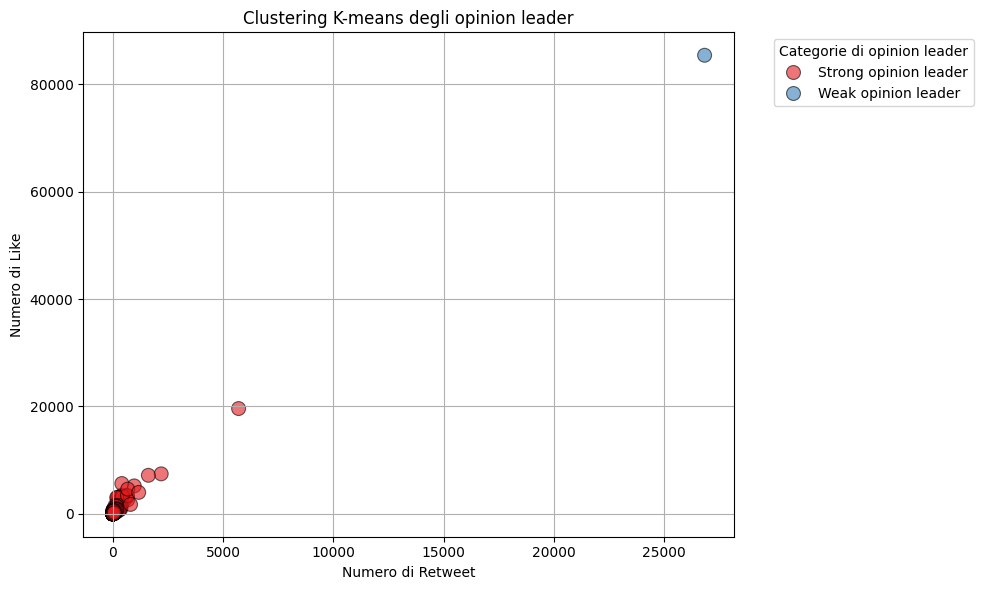

In [14]:
# Grafico dei cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merge_2_pos,
    x='retweet_count',
    y='like_count',
    hue='opinion_leader',
    palette='Set1',
    s=100,
    alpha=0.6,
    edgecolor='black'
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Migliora la disposizione degli elementi nel grafico
plt.show()

In [15]:
# Filtra i tweet nella classe 'Strong opinion leader'
strong_opinion_leaders = merge_2_pos[merge_2_pos['opinion_leader'] == 'Strong opinion leader']

# Conta il numero di strong opinion leader
num_strong_opinion_leaders = strong_opinion_leaders.shape[0]

# Stampa il numero di strong opinion leader
print(f"Numero di strong opinion leader: {num_strong_opinion_leaders}")

# Conta il numero di tweet per ciascun strong opinion leader
tweet_counts = strong_opinion_leaders['author_id'].value_counts()

# Stampa il numero di tweet per ciascun strong opinion leader
print("\nNumero di tweet per ciascun strong opinion leader:")
for author_id, count in tweet_counts.items():
    print(f"Autor ID: {author_id}, Numero di tweet: {count}")

# Stampa le informazioni dei tweet degli strong opinion leader
table = strong_opinion_leaders[['retweet_count', 'like_count', 'quote_count', 'reply_count', 
                                'author_id', 'tweet_id', 'content', 'description', 
                                'Sentiment', 'collection']].reset_index(drop=True)

# Converti il dataframe in una lista di tuple per tabulate
table_data = [tuple(x) for x in table.values]

# Intestazioni delle colonne per la tabella
headers = ['Retweet Count', 'Like Count', 'Quote Count', 'Reply Count', 
           'Author ID', 'Tweet ID', 'Content', 'Description', 
           'Sentiment', 'Collection']

# Stampa la tabella utilizzando tabulate
print("\nInformazioni dettagliate dei tweet degli strong opinion leader:")
print(tabulate(table_data, headers=headers, tablefmt='grid'))

# Filtra le informazioni degli utenti per gli strong opinion leader
strong_opinion_leader_ids = strong_opinion_leaders['author_id'].unique()
strong_opinion_leader_info = tweet_users[tweet_users['user_id'].isin(strong_opinion_leader_ids)]

# Converti il dataframe in una lista di tuple per tabulate
user_table_data = [tuple(x) for x in strong_opinion_leader_info.values]

# Intestazioni delle colonne per la tabella delle informazioni degli utenti
user_headers = list(strong_opinion_leader_info.columns)

# Stampa la tabella utilizzando tabulate
print("\nInformazioni degli utenti strong opinion leader:")
print(tabulate(user_table_data, headers=user_headers, tablefmt='grid'))


Numero di strong opinion leader: 775

Numero di tweet per ciascun strong opinion leader:
Autor ID: 879737099074887682, Numero di tweet: 5
Autor ID: 4774781723, Numero di tweet: 3
Autor ID: 2963760779, Numero di tweet: 3
Autor ID: 1177303824492462080, Numero di tweet: 3
Autor ID: 129707325, Numero di tweet: 3
Autor ID: 23725004, Numero di tweet: 3
Autor ID: 1188491780108500992, Numero di tweet: 3
Autor ID: 939956786802565120, Numero di tweet: 2
Autor ID: 1268587364869423105, Numero di tweet: 2
Autor ID: 960311264248516609, Numero di tweet: 2
Autor ID: 1112810712844230656, Numero di tweet: 2
Autor ID: 1046611645500452864, Numero di tweet: 2
Autor ID: 2691923438, Numero di tweet: 2
Autor ID: 1074525963696914432, Numero di tweet: 2
Autor ID: 1307187168868282368, Numero di tweet: 2
Autor ID: 1351371388066533378, Numero di tweet: 2
Autor ID: 852006060915179520, Numero di tweet: 2
Autor ID: 4914963999, Numero di tweet: 2
Autor ID: 897981842783170561, Numero di tweet: 2
Autor ID: 1337791478706

# Token positivo 8898

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 8898

In [16]:
# Seleziona le colonne rilevanti per il clustering
X = merge_3_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_3_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}  # Personalizza le etichette come desiderato
merge_3_pos['opinion_leader'] = merge_3_pos['cluster'].map(cluster_mapping)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Per n_clusters = 2, la media silhouette_score è: 0.9701645655028709
Per n_clusters = 3, la media silhouette_score è: 0.9476304497268087


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Per n_clusters = 4, la media silhouette_score è: 0.8880450162371624


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### GRAFICO K-MEANS per token 8898

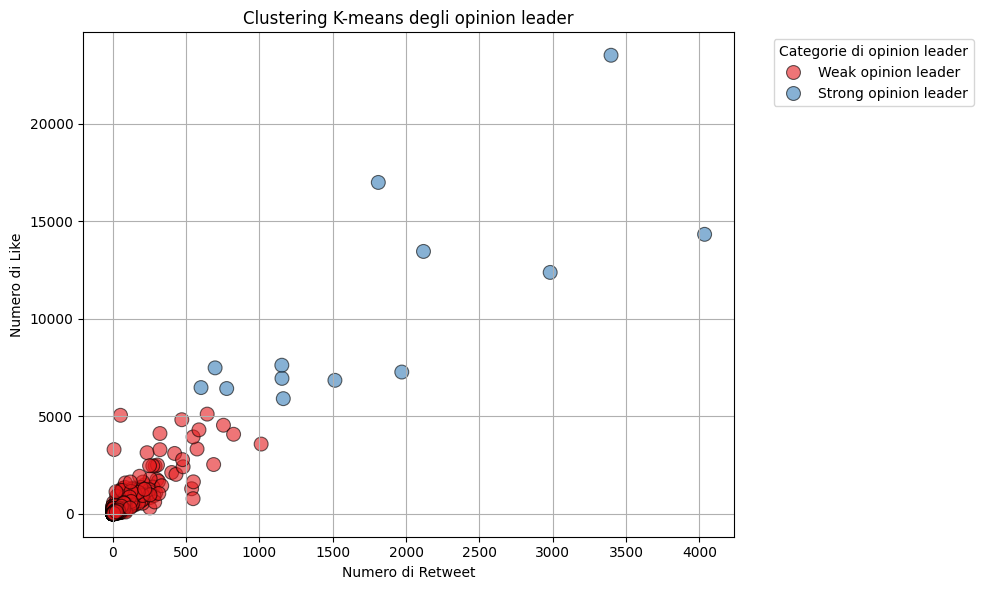

In [17]:
# Grafico dei cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merge_3_pos,
    x='retweet_count',
    y='like_count',
    hue='opinion_leader',
    palette='Set1',
    s=100,
    alpha=0.6,
    edgecolor='black' 
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Migliora la disposizione degli elementi nel grafico
plt.show()

In [18]:
# Filtra i tweet nella classe 'Strong opinion leader'
strong_opinion_leaders = merge_3_pos[merge_3_pos['opinion_leader'] == 'Strong opinion leader']

# Conta il numero di strong opinion leader
num_strong_opinion_leaders = strong_opinion_leaders.shape[0]

# Stampa il numero di strong opinion leader
print(f"Numero di strong opinion leader: {num_strong_opinion_leaders}")

# Conta il numero di tweet per ciascun strong opinion leader
tweet_counts = strong_opinion_leaders['author_id'].value_counts()

# Stampa il numero di tweet per ciascun strong opinion leader
print("\nNumero di tweet per ciascun strong opinion leader:")
for author_id, count in tweet_counts.items():
    print(f"Autor ID: {author_id}, Numero di tweet: {count}")

# Stampa le informazioni dei tweet degli strong opinion leader
table = strong_opinion_leaders[['retweet_count', 'like_count', 'quote_count', 'reply_count', 
                                'author_id', 'tweet_id', 'content', 'description', 
                                'Sentiment', 'collection']].reset_index(drop=True)

# Converti il dataframe in una lista di tuple per tabulate
table_data = [tuple(x) for x in table.values]

# Intestazioni delle colonne per la tabella
headers = ['Retweet Count', 'Like Count', 'Quote Count', 'Reply Count', 
           'Author ID', 'Tweet ID', 'Content', 'Description', 
           'Sentiment', 'Collection']

# Stampa la tabella utilizzando tabulate
print("\nInformazioni dettagliate dei tweet degli strong opinion leader:")
print(tabulate(table_data, headers=headers, tablefmt='grid'))


# Filtra le informazioni degli utenti per gli strong opinion leader
strong_opinion_leader_ids = strong_opinion_leaders['author_id'].unique()
strong_opinion_leader_info = tweet_users[tweet_users['user_id'].isin(strong_opinion_leader_ids)]

# Converti il dataframe in una lista di tuple per tabulate
user_table_data = [tuple(x) for x in strong_opinion_leader_info.values]

# Intestazioni delle colonne per la tabella delle informazioni degli utenti
user_headers = list(strong_opinion_leader_info.columns)

# Stampa la tabella utilizzando tabulate
print("\nInformazioni degli utenti strong opinion leader:")
print(tabulate(user_table_data, headers=user_headers, tablefmt='grid'))


Numero di strong opinion leader: 13

Numero di tweet per ciascun strong opinion leader:
Autor ID: 1023747767942963200, Numero di tweet: 1
Autor ID: 1321868283176341504, Numero di tweet: 1
Autor ID: 1320705149426421763, Numero di tweet: 1
Autor ID: 1060381519699763200, Numero di tweet: 1
Autor ID: 1275823052698206209, Numero di tweet: 1
Autor ID: 885739301094309889, Numero di tweet: 1
Autor ID: 1312706079629824000, Numero di tweet: 1
Autor ID: 1384434156508155905, Numero di tweet: 1
Autor ID: 16718799, Numero di tweet: 1
Autor ID: 1351704255833518082, Numero di tweet: 1
Autor ID: 110561921, Numero di tweet: 1
Autor ID: 224916914, Numero di tweet: 1
Autor ID: 1037237812624420865, Numero di tweet: 1

Informazioni dettagliate dei tweet degli strong opinion leader:
+-----------------+--------------+---------------+---------------+---------------------+---------------------+-----------------------------------------------------------------------------------------------------------------------

# Token positivo 4704

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 4704

In [19]:
# Seleziona le colonne rilevanti per il clustering
X = merge_4_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_4_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}  # Personalizza le etichette come desiderato
merge_4_pos['opinion_leader'] = merge_4_pos['cluster'].map(cluster_mapping)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Per n_clusters = 2, la media silhouette_score è: 0.999226004366453


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Per n_clusters = 3, la media silhouette_score è: 0.9859932608483412


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Per n_clusters = 4, la media silhouette_score è: 0.9611927143022714


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### GRAFICO K-MEANS per token 4704

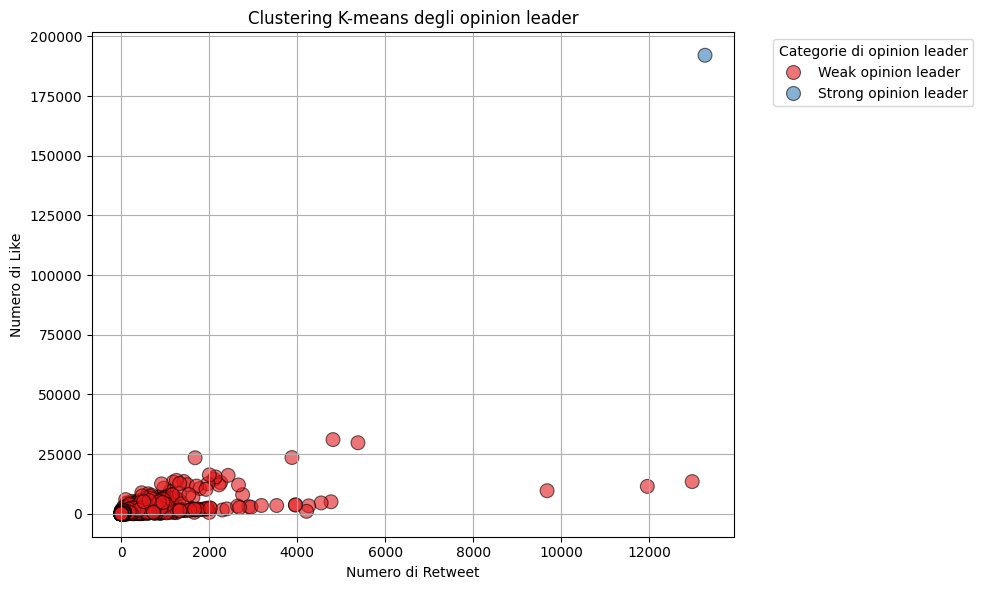

In [20]:
# Grafico dei cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merge_4_pos,
    x='retweet_count',
    y='like_count',
    hue='opinion_leader',
    palette='Set1',
    s=100,
    alpha=0.6,
    edgecolor='black' 
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Migliora la disposizione degli elementi nel grafico
plt.show()

In [21]:
# Filtra i tweet nella classe 'Strong opinion leader'
strong_opinion_leaders = merge_4_pos[merge_4_pos['opinion_leader'] == 'Strong opinion leader']

# Conta il numero di strong opinion leader
num_strong_opinion_leaders = strong_opinion_leaders.shape[0]

# Stampa il numero di strong opinion leader
print(f"Numero di strong opinion leader: {num_strong_opinion_leaders}")

# Conta il numero di tweet per ciascun strong opinion leader
tweet_counts = strong_opinion_leaders['author_id'].value_counts()

# Stampa il numero di tweet per ciascun strong opinion leader
print("\nNumero di tweet per ciascun strong opinion leader:")
for author_id, count in tweet_counts.items():
    print(f"Autor ID: {author_id}, Numero di tweet: {count}")

# Stampa le informazioni dei tweet degli strong opinion leader
table = strong_opinion_leaders[['retweet_count', 'like_count', 'quote_count', 'reply_count', 
                                'author_id', 'tweet_id', 'content', 'description', 
                                'Sentiment', 'collection']].reset_index(drop=True)

# Converti il dataframe in una lista di tuple per tabulate
table_data = [tuple(x) for x in table.values]

# Intestazioni delle colonne per la tabella
headers = ['Retweet Count', 'Like Count', 'Quote Count', 'Reply Count', 
           'Author ID', 'Tweet ID', 'Content', 'Description', 
           'Sentiment', 'Collection']

# Stampa la tabella utilizzando tabulate
print("\nInformazioni dettagliate dei tweet degli strong opinion leader:")
print(tabulate(table_data, headers=headers, tablefmt='grid'))

# Filtra le informazioni degli utenti per gli strong opinion leader
strong_opinion_leader_ids = strong_opinion_leaders['author_id'].unique()
strong_opinion_leader_info = tweet_users[tweet_users['user_id'].isin(strong_opinion_leader_ids)]

# Converti il dataframe in una lista di tuple per tabulate
user_table_data = [tuple(x) for x in strong_opinion_leader_info.values]

# Intestazioni delle colonne per la tabella delle informazioni degli utenti
user_headers = list(strong_opinion_leader_info.columns)

# Stampa la tabella utilizzando tabulate
print("\nInformazioni degli utenti strong opinion leader:")
print(tabulate(user_table_data, headers=user_headers, tablefmt='grid'))


Numero di strong opinion leader: 1

Numero di tweet per ciascun strong opinion leader:
Autor ID: 158487331, Numero di tweet: 1

Informazioni dettagliate dei tweet degli strong opinion leader:
+-----------------+--------------+---------------+---------------+-------------+---------------------+------------------------------------------------------------------+--------------------------------------+-------------+-------------------+
|   Retweet Count |   Like Count |   Quote Count |   Reply Count |   Author ID |            Tweet ID | Content                                                          | Description                          | Sentiment   | Collection        |
+=================+==============+===============+===============+=============+=====================+==================================================================+======================================+=============+===================+
|           13270 |       192137 |         10642 |         12575 |   158487331 